# NLP Text Generation 

## This Notebook is a part of text generation (Lyrics) [project](https://github.com/AsifKibria/NLP_Text_Generation). This is the part of *Data Preprocessing and cleaning*.

### Include our required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Importing the data to df (Only the lyrics data )
df = pd.read_csv('raw_data/lyrics-data.csv')

In [26]:
df.head()

,ALink,SName,SLink,Lyric,Idiom
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH


In [27]:
df.drop(['ALink', 'SName', 'SLink'], axis = 1, inplace = True)

In [28]:
df.head()

,Lyric,Idiom
0,I could feel at the time. There was no way of ...,ENGLISH
1,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,These are. These are days you'll remember. Nev...,ENGLISH
3,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,Trudging slowly over wet sand. Back to the ben...,ENGLISH


In [29]:
df

,Lyric,Idiom
0,I could feel at the time. There was no way of ...,ENGLISH
1,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,These are. These are days you'll remember. Nev...,ENGLISH
3,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,Trudging slowly over wet sand. Back to the ben...,ENGLISH
...,...,...
209517,Eu vou botar teu nome na macumba. Vou procurar...,PORTUGUESE
209518,Vou procurar um novo amor na minha vida. Porqu...,PORTUGUESE
209519,Quando a mare vazá. Vou vê juliana. Vou vê jul...,PORTUGUESE
209520,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",PORTUGUESE


In [30]:
df['Idiom'].value_counts()

ENGLISH           114723
PORTUGUESE         85085
SPANISH             4812
ITALIAN              626
FRENCH               471
GERMAN               314
KINYARWANDA           88
ICELANDIC             47
SWEDISH               27
FINNISH               24
INDONESIAN            17
GALICIAN              12
ESTONIAN              12
HAITIAN_CREOLE         9
IRISH                  9
DANISH                 9
BASQUE                 8
TAGALOG                7
CROATIAN               7
NORWEGIAN              7
CATALAN                6
SUNDANESE              6
DUTCH                  5
SWAHILI                5
RUSSIAN                4
MALAY                  4
SERBIAN                3
KURDISH                2
SESOTHO                2
CEBUANO                2
JAPANESE               2
MALAGASY               2
TURKISH                2
ARABIC                 2
NYANJA                 2
HUNGARIAN              1
CZECH                  1
SLOVENIAN              1
GANDA                  1
HMONG                  1


In [31]:
df = df[df['Idiom']=='ENGLISH']

In [32]:
df

,Lyric,Idiom
0,I could feel at the time. There was no way of ...,ENGLISH
1,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,These are. These are days you'll remember. Nev...,ENGLISH
3,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,Trudging slowly over wet sand. Back to the ben...,ENGLISH
...,...,...
207619,I was so high I did not recognize. The fire bu...,ENGLISH
207624,Well sometimes I go out by myself. And I look ...,ENGLISH
207628,Feeling my way through the darkness. Guided by...,ENGLISH
207792,"Don't, don't, that's what you say. Each time t...",ENGLISH


In [33]:
# Keeping only the Lyrics column, remove everything else 
df.drop(['Idiom'], axis=1, inplace = True)

/Users/asifkibria/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
# Removing headers
# df = df.rename(columns=df.iloc[0]).drop(df.index[0])

In [35]:
df.size

114723

In [36]:
# The size of this dataset is sofar 114723 songs lyrics, Let's reduce it to 5000 songs lyrics
df = df[:5000]

In [37]:
# Joining in a Single cell for processing a single text 
df = pd.DataFrame(df.agg(lambda x: ' '.join(x.astype(str)))).T

In [38]:
df

,Lyric
0,I could feel at the time. There was no way of ...


In [39]:
# Let's count the total number of words in our dataset.
df['Lyric'].str.count(' ') + 1

0    1104726
Name: Lyric, dtype: int64

In [48]:
# Lowercased everything
df['Lyric'] = df['Lyric'].str.lower()

In [49]:
#Counting the number of unique words in the data sets.
df.Lyric.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

the          44294
i            35481
you          30852
to           25194
and          24881
             ...  
um..             1
"hi,             1
dunaway).        1
ezrin,           1
gotcha.          1
Length: 47720, dtype: int64

In [55]:
#Need to keep only lowercased letters in the words. Others numerics and special characters needed to be removed (Other than "," "''").
df['Lyric'] = df['Lyric'].str.replace('(', '')


/var/folders/mk/r1qb9ywj4d96pwpmy4w41d480000gn/T/ipykernel_81887/2411793745.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Lyric'] = df['Lyric'].str.replace('(', '')


In [56]:
#If It Worked!
df.Lyric.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

the           44331
i             35750
you           30954
to            25221
and           24975
              ...  
enough!           1
child-king        1
dimented          1
ruled.            1
adapting,.        1
Length: 47069, dtype: int64

In [57]:
#Need to keep only lowercased letters in the words. Others numerics and special characters needed to be removed (Other than "," "''").
df['Lyric'] = df['Lyric'].str.replace(')', '')


/var/folders/mk/r1qb9ywj4d96pwpmy4w41d480000gn/T/ipykernel_81887/2782205366.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Lyric'] = df['Lyric'].str.replace(')', '')


In [115]:
#If It Worked!
df['Lyric'] = df['Lyric'].str.replace('@@', '')
counts_of_unique_words = df.Lyric.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
counts_of_unique_words
counts_of_unique_words.tail(40)

chats             1
backseat.         1
alone"            1
eurydice!.        1
écho.             1
comme             1
l'eau.            1
côté              1
l'autre           1
messenger..       1
groan             1
vigil.            1
sister's.         1
reset             1
disassociate..    1
outside..         1
postman.          1
tree's.           1
countryside.      1
orpheus,          1
appliances.       1
kind's            1
une               1
econosize         1
joan.             1
respose           1
voix.             1
j'entends         1
battled!          1
sainte.           1
desolate..        1
muse.             1
alors             1
implore           1
crois             1
penetrate,        1
juge.             1
"recreate         1
bori              1
harm-free         1
dtype: int64

In [116]:
counts_of_unique_words.head(40)

the       44334
i         35765
you       30961
to        25229
and       24983
a         22252
my        14356
in        13465
of        12534
your      11712
it        11075
me        10081
i'm        9878
that       8671
on         8420
all        8293
we         8099
is         7997
for        7295
so         7092
be         6607
don't      6504
but        6044
it's       5947
this       5823
with       5500
just       5445
what       5382
like       5296
when       4936
no         4837
got        4534
know       4505
me.        4429
you're     4370
can        4200
if         3975
are        3921
you.       3910
get        3875
dtype: int64

In [117]:
#Cleaned for the purpose so far. TODO:removing non-english characters.
counts_of_unique_words

the           44334
i             35765
you           30961
to            25229
and           24983
              ...  
penetrate,        1
juge.             1
"recreate         1
bori              1
harm-free         1
Length: 45568, dtype: int64

<AxesSubplot:>

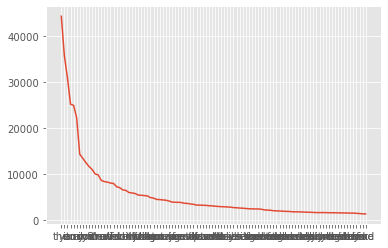

In [137]:
#Let's Plot a Linegraph to see the wordcounts of first 100 Words frequency.
plot_data = counts_of_unique_words[:100]
#plt.figure(figsize=(60,25))
sns.lineplot(data=plot_data)

In [138]:
#This is a very steep lines, that means words like 'the', 'i', 'you', 'to' used more frequently in the lyrics.
plot_data

the      44334
i        35765
you      30961
to       25229
and      24983
         ...  
down.     1564
think     1522
too       1473
here      1406
find      1391
Length: 100, dtype: int64

In [142]:
#Now Export the file as a text file to train in "torch-rnn" to generate some lyrics.
np.savetxt(r'Data/input.txt', df.values, fmt='%str')

## Data processing is now completed. Follow the next steps described [here](https://github.com/AsifKibria/NLP_Text_Generation)